## Assignment 7 Group 1

#### We have taken a dataset from kaggle which contains the Hourly energy demand generation and it contains the energy dataset of price value required to consume the energy generated

In [2]:
import pandas as pd
import random
df = pd.read_csv("/Users/aniketpatole/Downloads/energy_dataset.csv", na_values='NA') #loading the csv dataset 

#trimming the dataset with just the timestamp and the 'price value' columns 
columns_to_keep = [df.columns[0], df.columns[-1]] 
df = df[columns_to_keep]

#converting the time col to string and then trimming that col into 2 different columns 
# 1. Year-Month
# 2. Day(01-31)
df['time'] = df['time'].astype(str)
df['Year-Month'] = df['time'].str[:7]
df['Day'] = df['time'].str[8:10]
col = [df.columns[1], df.columns[2], df.columns[-1]]
df = df[col]

#converting the dataframe into a set to get rid of the duplicates and then reconverting it to a dataframe
df_set = set(map(tuple, df.to_records(index=False)))
recreated_df = pd.DataFrame(list(df_set), columns=df.columns)
recreated_df1 = recreated_df.groupby(['Year-Month', 'Day']).agg({'price actual': 'mean'}).reset_index()

#pivoting the dataframe in sucha way that the Year-Month are the rows and the Days (01-31) are the columns with price values as the datavalues
pivoted_df = recreated_df1.pivot(index='Year-Month', columns='Day', values='price actual')
df = pivoted_df
df

Day,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
Year-Month,,,,,,,,,,,,,,,,,,,,,
2015-01,62.148750,69.327083,65.706667,58.264167,74.568750,68.855417,78.775833,78.810417,76.598333,68.272500,...,63.945000,66.746250,58.130000,53.517083,70.522083,68.084167,71.007391,57.161250,46.515000,31.167500
2015-02,31.626250,62.244583,56.500000,53.757917,56.560000,60.888333,66.255000,53.650417,65.583333,73.359167,...,31.283750,44.846250,41.637083,48.607826,54.505000,53.816087,47.107917,NaN,NaN,NaN
2015-03,39.541667,56.295000,66.383750,47.649565,40.747083,60.835833,57.438750,51.822083,58.297500,64.659167,...,53.136667,65.950417,57.498333,54.272500,56.178261,57.610833,56.048750,46.069545,55.318333,55.614583
2015-04,43.440833,51.768750,53.404167,40.550833,38.687917,52.682083,58.325000,53.240833,62.929583,67.219167,...,61.939167,73.042500,69.632609,59.555000,50.185417,56.367083,68.067500,71.206957,65.714783,NaN
2015-05,55.008261,55.690833,55.097500,58.728333,56.602609,71.615217,61.300833,51.276667,63.392174,54.783750,...,55.940000,47.344583,45.460000,59.989583,58.546087,59.654167,63.398333,65.186250,60.353913,58.758333
2015-06,66.370000,66.528750,65.924348,66.899167,66.434583,58.446667,57.709565,67.260417,67.273333,67.028333,...,73.036087,70.981667,71.663043,73.432917,74.385217,65.532083,60.432917,72.537826,71.684583,NaN
2015-07,71.577083,75.644583,72.085833,65.303043,60.744583,71.715000,73.080833,71.505000,71.729167,74.590870,...,75.948333,76.162500,72.007083,61.741250,59.641250,73.444167,74.845417,73.757917,70.086667,68.734167
2015-08,61.898333,55.418696,69.542917,68.915833,69.540455,70.752500,70.497917,63.786667,56.373333,68.510417,...,61.698750,44.125833,62.021250,68.275000,62.956667,59.720435,67.940833,60.342083,55.945000,71.102083
2015-09,66.340000,65.799167,62.697500,63.270833,59.870000,59.852083,67.875833,69.578750,68.887917,67.240833,...,57.151667,58.152083,60.351667,60.671304,58.398750,54.837083,59.830417,61.843750,63.747391,NaN


In [12]:
# Using fillna function of dataframe to fill the NAN values with the mean of the columns 
for column in df.columns:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)
df

Day,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
Year-Month,,,,,,,,,,,,,,,,,,,,,
2015-01,62.148750,69.327083,65.706667,58.264167,74.568750,68.855417,78.775833,78.810417,76.598333,68.272500,...,63.945000,66.746250,58.130000,53.517083,70.522083,68.084167,71.007391,57.161250,46.515000,31.167500
2015-02,31.626250,62.244583,56.500000,53.757917,56.560000,60.888333,66.255000,53.650417,65.583333,73.359167,...,31.283750,44.846250,41.637083,48.607826,54.505000,53.816087,47.107917,57.801804,57.292914,56.063964
2015-03,39.541667,56.295000,66.383750,47.649565,40.747083,60.835833,57.438750,51.822083,58.297500,64.659167,...,53.136667,65.950417,57.498333,54.272500,56.178261,57.610833,56.048750,46.069545,55.318333,55.614583
2015-04,43.440833,51.768750,53.404167,40.550833,38.687917,52.682083,58.325000,53.240833,62.929583,67.219167,...,61.939167,73.042500,69.632609,59.555000,50.185417,56.367083,68.067500,71.206957,65.714783,56.063964
2015-05,55.008261,55.690833,55.097500,58.728333,56.602609,71.615217,61.300833,51.276667,63.392174,54.783750,...,55.940000,47.344583,45.460000,59.989583,58.546087,59.654167,63.398333,65.186250,60.353913,58.758333
2015-06,66.370000,66.528750,65.924348,66.899167,66.434583,58.446667,57.709565,67.260417,67.273333,67.028333,...,73.036087,70.981667,71.663043,73.432917,74.385217,65.532083,60.432917,72.537826,71.684583,56.063964
2015-07,71.577083,75.644583,72.085833,65.303043,60.744583,71.715000,73.080833,71.505000,71.729167,74.590870,...,75.948333,76.162500,72.007083,61.741250,59.641250,73.444167,74.845417,73.757917,70.086667,68.734167
2015-08,61.898333,55.418696,69.542917,68.915833,69.540455,70.752500,70.497917,63.786667,56.373333,68.510417,...,61.698750,44.125833,62.021250,68.275000,62.956667,59.720435,67.940833,60.342083,55.945000,71.102083
2015-09,66.340000,65.799167,62.697500,63.270833,59.870000,59.852083,67.875833,69.578750,68.887917,67.240833,...,57.151667,58.152083,60.351667,60.671304,58.398750,54.837083,59.830417,61.843750,63.747391,56.063964


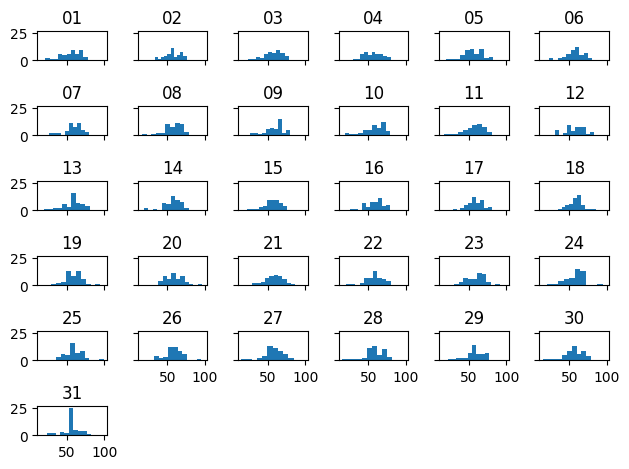

In [4]:
#creating a histogram of plots for each day and the price values
import numpy as np
from pymc3 import Normal
import matplotlib.pyplot as plt
%matplotlib inline
_ = df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

In [5]:
mean = np.mean(df) # finding the mean and standard deviation

In [6]:
sd = np.std(df)

<Axes: >

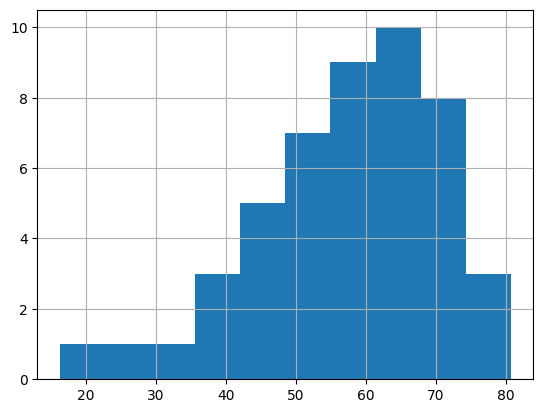

In [7]:
#after ploting one of the columns '11' in histogram we can deduce that the plot is kindof a Gaussian/Normal distribution
df['11'].hist()

In [8]:
mean,sd

(57.85408898044617,
 Day
 01    13.066062
 02    10.880858
 03    12.097661
 04    11.780590
 05    12.757017
 06    12.062680
 07    11.827108
 08    11.864943
 09    12.337535
 10    13.454415
 11    12.925561
 12    12.534993
 13    12.753468
 14    11.958944
 15    11.217963
 16    11.424499
 17    10.290022
 18     9.614032
 19    11.150340
 20    11.476950
 21    11.608164
 22    11.415492
 23    11.857619
 24    12.726903
 25    11.247874
 26    11.629728
 27    12.634074
 28    12.517972
 29    11.703431
 30    12.538082
 31    11.448154
 dtype: float64)

In [9]:
df_mean = df.mean()
df_var = df.var() # calculating the variance of each column
df_mean, df_var

(Day
 01    55.029832
 02    57.538302
 03    57.113242
 04    56.448176
 05    56.189091
 06    57.529386
 07    58.614472
 08    57.897716
 09    59.044384
 10    57.919977
 11    57.727670
 12    58.259047
 13    57.340765
 14    56.834480
 15    56.492201
 16    58.810899
 17    59.005473
 18    58.936708
 19    59.273862
 20    59.267810
 21    58.227805
 22    58.713849
 23    59.557404
 24    58.211196
 25    58.382631
 26    58.503124
 27    57.969284
 28    57.479289
 29    57.801804
 30    57.292914
 31    56.063964
 dtype: float64,
 Day
 01    174.354353
 02    120.912072
 03    149.467293
 04    141.735127
 05    166.204068
 06    148.604175
 07    142.856657
 08    143.772135
 09    155.453394
 10    184.872802
 11    170.624817
 12    160.469162
 13    166.111609
 14    146.059237
 15    128.520195
 16    133.296178
 17    108.137419
 18     94.396207
 19    126.975399
 20    134.522946
 21    137.616491
 22    133.086093
 23    143.594691
 24    165.420325
 25    129.206

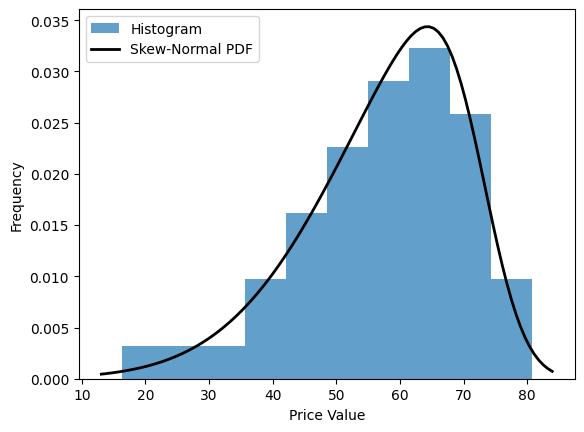

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skewnorm



# selecting a column to plot our probability density function
column_name = '11'
data = df[column_name]


plt.hist(data, density=True, alpha=0.7, label='Histogram')

# Fitting a the normal distribution with right skewness as the basic normal distribution was not fitting perfectly 
a, loc, scale = skewnorm.fit(data)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)


pdf_values = skewnorm.pdf(x, a, loc, scale)

# Overlay the PDF curve
plt.plot(x, pdf_values, 'k', linewidth=2, label='Skew-Normal PDF')


plt.xlabel('Price Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


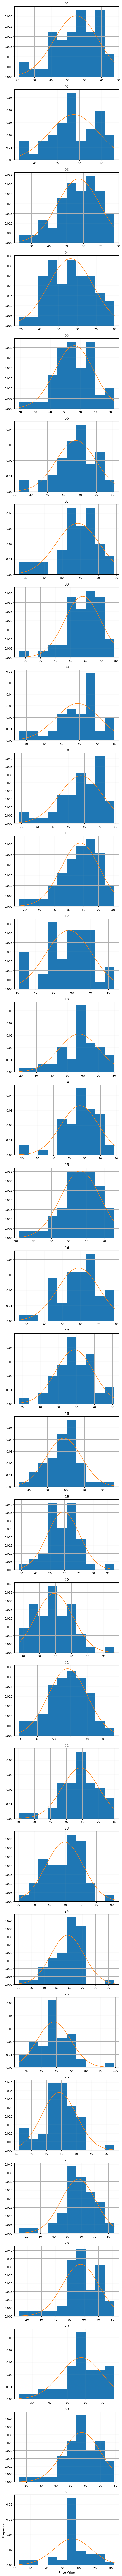

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# plotting the all the columns using the above skewnorm distribution funtion
# Get the number of columns in the DataFrame
num_columns = len(df.columns)


fig, axs = plt.subplots(num_columns, 1, figsize=(6, 4 * num_columns))

for i, column in enumerate(df.columns):
    ax = axs[i]
    
    
    data = df[column].dropna()  
    
    
    ax.hist(data, density=True)
    
    
    x = np.linspace(data.min(), data.max(), 1000)
    df_mean = data.mean()
    df_var = data.var()
    ax.plot(x, norm.pdf(x, df_mean, np.sqrt(df_var)))
    
    
    label = f'mean = {df_mean:.2f}\nvar = {df_var:.2f}'
    ax.annotate(label, xy=(10, 0.2))
    
    ax.set_title(column)
    ax.grid(True)
    

plt.tight_layout()
plt.show()


In [20]:
# Now to make a prediction out of the normal distribution we created

from scipy.stats import skewnorm


prediction_value = 21
pdf_at_prediction = skewnorm.pdf(prediction_value, a, loc, scale)
pdf_at_prediction

#There is a 0.13% chance the prediction for 21 price value using our skewnorm probability density function

0.0013568304207232263